In [1]:
from model import *
from data import *

data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')

myGene = trainGenerator(2,'/home/ubuntu/input/train','images','masks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet_membrane.hdf5', monitor='loss',verbose=1, save_best_only=True)
model.fit_generator(myGene,steps_per_epoch=300,epochs=100,callbacks=[model_checkpoint])

Using TensorFlow backend.
/home/ubuntu/unet/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/100
Found 4000 images belonging to 1 classes.
Found 4000 images belonging to 1 classes.
300/300 [==============================] - 171s 570ms/step - loss: 0.6026 - acc: 0.7405

Epoch 00001: loss improved from inf to 0.60265, saving model to unet_membrane.hdf5
Epoch 2/100
300/300 [==============================] - 130s 432ms/step - loss: 0.5773 - acc: 0.7460

Epoch 00002: loss improved from 0.60265 to 0.57734, saving model to unet_membrane.hdf5
Epoch 3/100
300/300 [==============================] - 130s 432ms/step - loss: 0.5399 - acc: 0.7630

Epoch 00003: loss improved from 0.57734 to 0.53990, saving model to unet_membrane.hdf5
Epoch 4/100
300/300 [==============================] - 130s 432ms/step - loss: 0.5188 - acc: 0.7560

Epoch 00004: loss improved from 0.53990 to 0.51880, saving model to unet_membrane.hdf5
Epoch 5/100
300/300 [==============================] - 129s 431ms/step - loss: 0.5727 - acc: 0.7430

Epoch 00005: loss did not improve from 0.51880
Epoch 6/100
300/300 

300/300 [==============================] - 129s 429ms/step - loss: 0.2818 - acc: 0.8903

Epoch 00050: loss did not improve from 0.22667
Epoch 51/100
300/300 [==============================] - 129s 429ms/step - loss: 0.2583 - acc: 0.9064

Epoch 00051: loss did not improve from 0.22667
Epoch 52/100
300/300 [==============================] - 129s 429ms/step - loss: 0.2303 - acc: 0.9184

Epoch 00052: loss did not improve from 0.22667
Epoch 53/100
300/300 [==============================] - 129s 429ms/step - loss: 0.2401 - acc: 0.9067

Epoch 00053: loss did not improve from 0.22667
Epoch 54/100
300/300 [==============================] - 129s 429ms/step - loss: 0.2049 - acc: 0.9275

Epoch 00054: loss improved from 0.22667 to 0.20488, saving model to unet_membrane.hdf5
Epoch 55/100
300/300 [==============================] - 129s 429ms/step - loss: 0.2190 - acc: 0.9165

Epoch 00055: loss did not improve from 0.20488
Epoch 56/100
300/300 [==============================] - 129s 429ms/step - loss:

### test your model and save predicted results

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


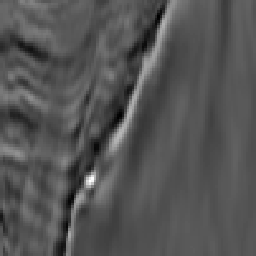

In [25]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, save_img, img_to_array, array_to_img

# train data
path = "/home/ubuntu/input/train/images/0061281eea.png"
image.load_img(path, grayscale=True, color_mode='rgb', target_size=(256,256))

In [26]:
image_load =load_img(path, grayscale=True, color_mode='rgb', target_size=(256,256))
array = image.img_to_array(image_load)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [27]:
array = array[np.newaxis,:] / 255.

In [28]:
results = model.predict(array)
saveResult("/home/ubuntu/input/result",results)

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


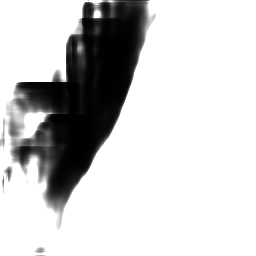

In [29]:
#predict
path2 = "/home/ubuntu/input/result/0_predict.png"
image.load_img(path2, grayscale=True, color_mode='rgb', target_size=(256,256))

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/keras_preprocessing/image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


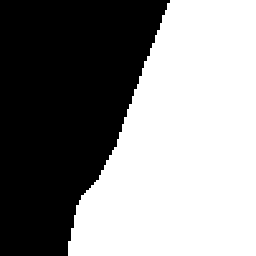

In [33]:
# mask data
path3 = "/home/ubuntu/input/train/masks/0061281eea.png"
image.load_img(path3, grayscale=True, color_mode='rgb', target_size=(256,256))

### 問題２

#model.pyより
"""
チャンネル方向にコンカットしている。
merge6 = concatenate([drop4,up6], axis = 3)

出力層はsigmoidをしようしている。２値分類なので当たり前
conv10 = Conv2D(1, 1, activation = 'sigmoid')(conv9)

adam, バイナリークロスエントロピー
model.compile(optimizer = Adam(lr = 1e-4), loss = 'binary_crossentropy', metrics = ['accuracy'])

デコーダーではアップランプリング、コンカット、コンボリューションを繰り返していく
"""